<a href="https://colab.research.google.com/github/mateusribeirocampos/diollm/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf

Dado que o range de valores possível para um pixel vai de 0-255, escalonamos os valores entre 0-1, esse proceso troa nosso modelo variante a pequenas alterações.

In [45]:
# from keras.datasets import mnist

#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
x_train = x_train / 255
x_test = x_test / 255

In [57]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Usada na camada de saída do classificador, onde realmente estamos tentando geral probabilidade para definir a classe de cada entreda.

In [58]:
optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,146 (6.33 MB)

 Trainable params: 1,659,146 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

None


Reduz o parâmetro de learning rate se não houver melhoras em deterinado número de épocas útil para encontrar o mínimo global

In [59]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [60]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [61]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                      y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_split=0.2,
                      verbose=1,
                      callbacks=[learning_rate_reduction])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 420s 279ms/step - accuracy: 0.1137 - loss: 2.3017 - val_accuracy: 0.1060 - val_loss: 2.3020 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 411s 258ms/step - accuracy: 0.1132 - loss: 2.3016 - val_accuracy: 0.1060 - val_loss: 2.3022 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 454s 266ms/step - accuracy: 0.1128 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 423s 253ms/step - accuracy: 0.1118 - loss: 2.3017 - val_accuracy: 0.1060 - val_loss: 2.3022 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 382s 254ms/step - accuracy: 0.1126 - loss: 2.3013 - val_accuracy: 0.1060 - val_loss: 2.3022 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 385s 257ms/step - accuracy: 0.1118 - loss: 2.3016 - val_accuracy: 0.1060 - val_loss: 2.3023 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 460s 269ms/step - accuracy: 0.1121 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss: 2.3023 - learning_rate: 0.0010
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 442s 268ms/step - acc

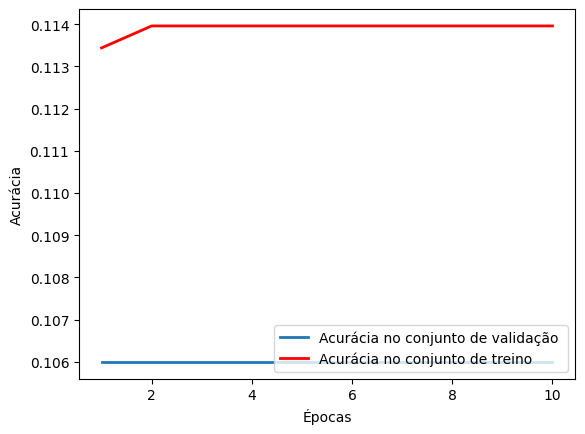

In [62]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação ')
accuracy = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy, linewidth=2.0)
plt.setp(accuracy_val, linewidth=2.0)
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()